# Molecular Evolution


So far we've focused mainly on the impact of evolutionary forces on
patterns of genetic variation within populations and species. Now lets
shift our attention to how those forces translate to genetic and genomic
differences between species.

# Rates of Molecular Evolution 

The basic quantity in the study of molecular evolution is sequence
divergence, or the number of differences between two species at some
locus. The basic "work flow\" for this kind of study goes something like
this

-   Sequence some locus out of two species (e.g. CFTR from a human and
    from a chimp)

-   Align those sequences (this is actually a technical process, but the
    basic idea is to find molecular homology)

-   Count the number of differences between sequences in the alignment

This count of the number of differences will be the raw data.
Conventionally, the next thing that is done is to express the number of
differences on a per site basis. This gets us to a quantity most often
called sequence divergence. This isn't of course necessary, but it is
convenient as some loci are bigger than others, thus normalization on
the basis of the individual site allows one to come levels of sequence
divergence from different genes or different portions of the genome.

As an example lets consider an an amino acid alignment of mammalian
sequences from a locus known as *FOXP2* ({numref}`foxp`) This alignment
consist of 716 amino acid residues from human, chimp, gorilla,
orangutan, rhesus macaque, and a mouse outgroup. Let's focus our
attention to human-chimp differences specifically. In this alignment we
see 2 simple amino acid differences and one possible insertion/deletion
difference. We'll ignore the insertion/deletion difference for the
remainder of this analysis; this is actually common practice in
molecular evolution studies, can you figure out why?

If we assume that humans and chimps diverged (i.e. became separate
species) from one another approximately 5 million years ago and that
there were 2 substitutions along the two lineages in that time, then the
rate of substitution at the *FOXP2* locus is 

$$\begin{aligned}
    \rho = \frac{2}{2 \times 5,000,000} = 2 \times 10^{-7} \mbox{ substitutions / year}
\end{aligned}$$

We need to multiply by two because each of our substitutions might have
taken place on either the lineage leading to humans or the lineage
leading to chimps. We of course could use the multiple alignment data in
Figure 1 to reconstruct ancestral states, and figure out along which
lineage those differences were most likely to occur, but we'll ignore
that complexity for now.

It's often convenient to express rates of substitution on a per site
basis. This allows us to simply compare rates at different loci, or in
different portions of the genome. In this case we have aligned 716 aa
sites, so our per site calculation is 

$$\begin{aligned}
    \rho = \frac{2 \times 10^{-7}}{716} = 2.8 \times 10^{-10} \mbox{ substitutions / year / site}.
\end{aligned}$$

Believe it or not this is a pretty typical rate of protein evolution. As
we proceed into this next section be careful about units- we'll be
developing a simple theoretical model as to what rates of substitution
should be that are based on generations as the unit time and not years.
This can actually lead to a surprising amount of confusion (even among
"professionals\"!) so let's be sure to get everything straight.

| ![FOXP2](figures/foxp2.png "Fig. 1. ") |
|:--:| 
| **Multiple Alignment of the *FOXP2* gene.** (adapted from Enard et al 2002)|

Consider a finite, diploid population that evolves only due to drift and
mutation. Substitutions will occur in this population because some
fraction of the mutations which enter the population every generation
will ultimately drift to frequency one, thus fixing in the population.
Thus intuitively we should see that the rate of substitution will be a
function of the mutation rate and the population size.

Let's define $u$ to be our probability of mutation per gamete per
generation. If there are $2N$ gametes produced in our population each
generation that on average we should have $2Nu$ mutations. In larger
populations we should have more mutations entering each generation, and
conversely smaller populations should have less mutational input if we
hold $u$ to be fixed. Naively we might then expect evolution (i.e.
substitution) to proceed faster in larger populations, and this is true
in some contexts, but not in our purely neutral population.

Under neutrality, each of our $2Nu$ new mutations should be equally
likely to fix. As we have proven early, the probability of any of those
mutations fixing is simply equal to its frequency, which for new
mutations in a diploid population is $1/(2N)$. We are now ready to
calculate the rate of substitution in our neutral population. The rate
of substitution should be equal to the number of new mutations entering
the population each generation times the probability that each of them
fix. That is 

$$\begin{aligned}
    \rho = 2Nu \times \frac{1}{2N} = u
\end{aligned}$$ 

So the
substitution rate of our neutral population is just equal to the
mutation rate. This is an amazing result from population genetics which
at first blush is counterintuitive. Shouldn't fixation that are the
result of drift be dependent on population size? Well the symmetry of
the situation is such that population size also determines the
mutational input of the population, canceling out the dependence of the
probability of fixation on population size so that the flux of fixations
is only dependent upon the rate of mutation. Truly incredible!

## Simulating neutral substitution

let's simulate this with some slim magic

In [41]:
%load_ext slim_magic

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, SVG

The slim_magic extension is already loaded. To reload it, use:
  %reload_ext slim_magic


In [42]:
%%slim_stats_reps_cstack 4 --out=slim_out --param_vec mu 1e-8 1e-7 1e-6 1e-5
// set up a multi locus simulation of drift
initialize()
{
    // set the overall mutation rate
    initializeMutationRate(mu);
    // m1 mutation type: neutral
    initializeMutationType("m1", 0.5, "f", 0.0);
    // g1 genomic element type: uses m1 probability 1
    initializeGenomicElementType("g1", c(m1), c(1.0));
    // uniform chromosome of length 10_000 site
    initializeGenomicElement(g1, 0, 1e4);
    // uniform recombination along the chromosome
    initializeRecombinationRate(1e-8);
    suppressWarnings(T);
}

// create a population of 100 individuals
1 {
    sim.addSubpop("p1", 100);

}
1:10000 late(){

    }
// run 
10000 late() {
    sim.simulationFinished();
    catn(c("generation",  "numFixations"), sep=",");
    catn(c("10000", length(sim.substitutions)), sep=",");
    }



In [43]:
slim_out

,numFixations,numFixations,numFixations,numFixations
generation,,,,
10000,1,16,77,993


Text(0, 0.5, 'simulated substitution rate')

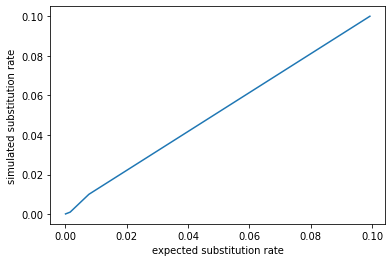

In [44]:
#plot number of fixations vs mutation rates

mus = np.array([1e-8, 1e-7, 1e-6, 1e-5])
slim_fixes = np.array(slim_out.iloc[0,:])

# we expect substitution rate to be mu & Length
L = 10_000
exp = mus * L

# substition rate is # fixations / generations
k = slim_fixes / 10_000 # generations

plt.plot(k, exp)
plt.xlabel("expected substitution rate")
plt.ylabel("simulated substitution rate")



Motoo Kimura, considered the founder of the Neutral Theory of Molecular
Evolution, along with Tomoko Ohta put this theoretical prediction to the
test by looking at rates of protein evolution over mammalian evolution.
What they found was that rates of protein evolution per amino acid site
per year were constant enough ($\approx 10^-9$) that indeed all
substitutions might be neutral. There were many problems with their
famous analysis, but perhaps the most glaring was that their unit of
time- why should mutation rates be constant across mammalian lineages on
a per year basis? The short answer is they shouldn't- our derivation
pertains to mutations per generation, thus we expect *a priori* that
under the neutral model substitution rates should depend on generation
times. Ohta did get back to this flaw later, but we unfortunately won't
have time to cover her further work (come take my advanced class if
you're interested).

Once Kimura and Ohta published their result, numerous researchers were
up in arms- of course there are differences in rates of evolution among
genes or portions of the genome! They would expect them do to different
levels of functional constraint. The notion of purifying selection was
dear to the proponents of the classical school of genetic variation
(e.g. Muller), so how does constraint fit in to the Kimura and Ohta
model. Really it's no problem for the neutral model. Imagine that some
fraction of mutations $f_0$ is purely neutral, and some other fraction
$1-f_0$ is strongly deleterious. If this is the case then that strongly
deleterious fraction should never participate in molecular evolution and
we have a quick fix to our model, namely 

$$\begin{aligned}
    \rho = \frac{1}{2N} \times 2Nuf_o = uf_o. \\
\end{aligned}$$ 

In [9]:
%%slim_stats_reps_cstack 4 --out=slim_out --param_vec f 0.1 0.5 0.7 0.9
// set up a multi locus simulation of drift
initialize()
{
    // set the overall mutation rate
    initializeMutationRate(1e-6);
    // m1 mutation type: neutral
    initializeMutationType("m1", 0.5, "f", 0.0);
    initializeMutationType("m2", 0.5, "f", -0.1);

    // g1 genomic element type: uses m1 probability f
    initializeGenomicElementType("g1", c(m1, m2), c(f, 1-f));
    // uniform chromosome of length 1 site
    initializeGenomicElement(g1, 0, 1e4);
    // uniform recombination along the chromosome
    initializeRecombinationRate(1e-8);
    suppressWarnings(T);
}

// create a population of 1000 individuals
1 {
    sim.addSubpop("p1", 1000);

}
1:10000 late(){

    }
// run 
20000 late() {
    sim.simulationFinished();
    catn(c("generation",  "numFixations"), sep=",");
    catn(c("20000", length(sim.substitutions)), sep=",");
    }

Text(0, 0.5, 'observed substitution rate')

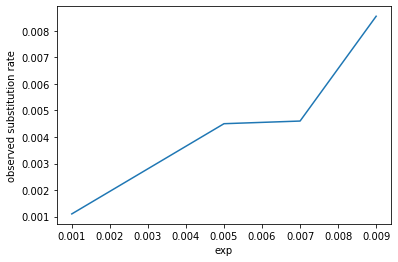

In [11]:
#plot number of fixations vs f

fs = np.array([0.1, 0.5, 0.7, 0.9])
slim_fixes = np.array(slim_out.iloc[0,:])

# we expect substitution rate to be mu & Length
L = 10000
mu = 1e-6
exp = mu * L * fs

# substition rate is # fixations / generations
k = slim_fixes / 20000 # generations

plt.plot(exp,k)
plt.xlabel("exp")
plt.ylabel("observed substitution rate")

In [27]:
%%slim_stats_reps_cstack 4 --out=slim_out_pos --param_vec s 1.0e-4 1.0e-3 1.0e-2 1.0e-1
// set up a multi locus simulation of drift
initialize()
{
    // set the overall mutation rate
    initializeMutationRate(1e-6);
    // m1 mutation type: neutral
    initializeMutationType("m1", 0.5, "f", 0.0);
    initializeMutationType("m2", 0.5, "f", 1.0 * s);

    // g1 genomic element type: uses m1 probability f
    initializeGenomicElementType("g1", c(m1, m2), c(0.8, 0.2));
    // uniform chromosome of length 1 site
    initializeGenomicElement(g1, 0, 1e4);
    // uniform recombination along the chromosome
    initializeRecombinationRate(1e-8);
    suppressWarnings(T);
}

// create a population of 1000 individuals
1 {
    sim.addSubpop("p1", 1000);

}
1:10000 late(){

    }
// run 
20000 late() {
    sim.simulationFinished();
    catn(c("generation",  "numFixations"), sep=",");
    catn(c("20000", length(sim.substitutions)), sep=",");
    }

In [28]:
%%slim_stats_reps_cstack 4 --out=slim_out_neg --param_vec s 1.0e-4 1.0e-3 1.0e-2 1.0e-1
// set up a multi locus simulation of drift
initialize()
{
    // set the overall mutation rate
    initializeMutationRate(1e-6);
    // m1 mutation type: neutral
    initializeMutationType("m1", 0.5, "f", 0.0);
    initializeMutationType("m2", 0.5, "f", -1.0 * s);

    // g1 genomic element type: uses m1 probability f
    initializeGenomicElementType("g1", c(m1, m2), c(0.8, 0.2));
    // uniform chromosome of length 1 site
    initializeGenomicElement(g1, 0, 1e4);
    // uniform recombination along the chromosome
    initializeRecombinationRate(1e-8);
    suppressWarnings(T);
}

// create a population of 1000 individuals
1 {
    sim.addSubpop("p1", 1000);

}
1:10000 late(){

    }
// run 
20000 late() {
    sim.simulationFinished();
    catn(c("generation",  "numFixations"), sep=",");
    catn(c("20000", length(sim.substitutions)), sep=",");
    }

Text(0, 0.5, 'observed substitution rate')

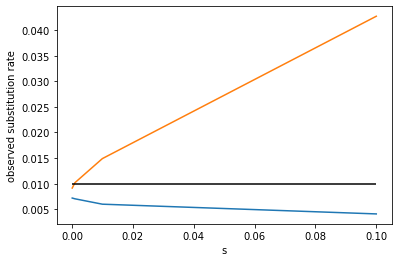

In [40]:
s = np.array([1e-4, 1e-3, 1e-2, 1e-1])
slim_fixes_neg = np.array(slim_out_neg.iloc[0,:])
slim_fixes_pos = np.array(slim_out_pos.iloc[0,:])

# we expect substitution rate to be mu & Length
L = 10000
mu = 1e-6
exp = mu * L * fs

# substition rate is # fixations / generations
kn = slim_fixes_neg / 20000 # generations
kp = slim_fixes_pos / 20000 # generations

plt.plot(s,np.flip(kn))
plt.plot(s,kp)
plt.hlines(mu * L,0,0.1, color='black')
plt.xlabel("s")
plt.ylabel("observed substitution rate")

Now
different rates of evolution can be explained purely as a function of
differing levels of constraint. More constraint leads to a lower
fraction of purely neutral mutations (i.e. smaller $f_0$) and thus
slower rates of evolution. Conversely loci which have little or no
functional constraint should be expected to evolve more quickly.

This simple fix is all well and good but do we really believe that
mutations are either strongly deleterious or neutral as Muller might
have? What about beneficial mutations? Shouldn't we be including those
in our model? Use your biological intuition here- what kinds of
mutations should participate in molecular evolution and eventually lead
to fixations between species? This is a central question to the study of
evolutionary genetics\...

Ask yourself this- what should the probability of fixation of a
beneficial or deleterious mutation be in relation to a neutral one?
Without getting in to the mathematics lets gain a qualitative
understanding of how rates of evolution change as a function of the
kinds of mutations that enter populations. {numref}`fixationRate` shows the expected
rates for these alternative models in comparison to the neutral rate.
This intuition leads to simple tests of the neutral model based on rates
of substitution- how would you go about asking if a gene was evolving
under say positive selection?

In [ ]:
---
name: fixationRate
---
**Rates of substitution.** Here we consider rates of substitution for
three models, a beneficial alleles model (i.e. Positive Selection) in
red, the neutral model in black, and a deleterious allele model (i.e.
Purifying selection) in blue. Rates are shown as a function of
population size, $N$, and are normalized by the mutation rate. The the
Neutral rate is constant at 1. 

# Molecular Clocks 

Most discussions of the rates of DNA evolution have been with respect to
the molecular clock hypothesis which states that there is a positive
linear relationship between time since two species diverged and amount
of genetic divergence (e.g., DNA sequence difference) between those
species - basically Kimura and Ohta's observation. The fact that genes
evolve at different rates indicate that there is not one molecular clock
but probably many molecular clocks that "tick\" at different rates, and
in fact that those "ticks\" might increase or decrease in rate over
time.

Lets say we could identify a reliable molecular clock (e.g., number of
amino acid substitutions in the cytochrome C gene), we can in principle
use this to date, or corroborate, evolutionary events of interest (e.g.,
the divergence times for species that do not have good fossil data). For
example: we know that there are $K_{xy}$ substitutions between species
$x$ and $y$ and we know that they diverged $T$years ago (from fossil
data). Thus the rate of molecular evolution is $r = K{xy}/2T$. Now lets
say we obtain the sequence of cytochrome C from 3 other species $a$, $b$
and $c$. If we wanted to known their divergence times, we could assume
that the molecular clock that we had calibrated using the the $x$ to $y$
comparison should apply and back calculate divergence times simple from
levels of genetic divergence between our other species. In my humble
opinion this approach has major short comings- what are they?

# Polymorphism and Divergence 

One of the nicest features of the neutral model is that it predicts a
correlation in levels of polymorphism within populations and divergence
between species. Briefly lets examine why this is so. We said already
that the rate of substitution at neutral loci is purely dependent on the
rate of mutation. That is $\rho=u$. Recall from our work on equilibrium
expectations of heterozygosity that we came up with an expression for
heterozygosity in neutral populations that depended on a joint parameter
of population size and mutation rate, $4Nu$. If we call this joint
parameter $\theta = 4Nu$, then we can rewrite our simple expression for
equilibrium heterozygosity as 

$$\begin{aligned}
    \hat{H} = \frac{\theta}{\theta + 1}.
\end{aligned}$$ 

As levels of
heterozygosity are going to depend on $\theta$ alone its of great
interest to try to estimate this parameter out of real data. Accordingly
there are numerous ways to estimate $\theta$, including just doing what
comes naturally and summing up the expected frequency of heterozygotes
from allele frequencies in a population.

Let's step back quickly and look at what we have here. Rates of
substitution will depend on $u$ where as levels of heterozygosity will
depend on both $u$ and $N$ through $\theta$, thus under neutrality we
should have a simple correlation between levels at diversity at a locus
and it's rate of substitution. Again this could lead to tests of the
neutral model of molecular evolution- can you figure out how that might
work?

Perhaps the simplest test of the neutral model which uses both
polymorphism and divergence is the McDonald-Kreitman test (or MK test).
The MK test compares the number of mutations which are polymorphic (i.e.
segregating within a population) to the number of mutations which are
fixed (i.e. contributing to divergence) between species at two loci, one
that should be neutral and one that might be under selection (the
classic example is synonymous sites versus non-synonymous sites). Call
the number of polymorphisms at synonymous sites and non-synonymous sites
$P_s$ and $P_n$ respectively. Similarly call the number of fixed
differences $D_s$ and $D_n$. Now lets imagine that each of our two sites
had different rates of mutation, $u_s$ and $u_n$. Under the neutral
model $P_s$ should be proportional to $4Nu_s$ and and $D_s$ should be
equal to $u_s$. The same should be true for non-synonymous sites, that
is $P_n \propto 4Nu_n$ and $D_n = u_n$. Now consider the ratio of
polymorphism to divergence at each of our loci. Under neutrality

$$\begin{aligned}
    \frac{P_s}{D_s} & = &\frac{P_n}{D_n}\\
    \frac{4Nu_s}{u_s} & = & \frac{4Nu_n}{u_n}
\end{aligned}$$

 Thus if
these ratios are not equal the neutral model can be rejected. This is a
powerful test of the neutral model and one that is very population in
modern evolutionary genomics.

Perhaps more than any other innovation in population genetics, this
expected correlation between polymorphism and divergence has had great
explanatory power in understanding patterns of genomic variation. For
example- why do regions of low recombination show less variation than
regions of normal recombination? This pattern, which has been observed
in everything from corn and pine trees, to fruit flies and humans can
only be understood in light of the mechanisms we have talked about.